For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week12-word-context-vectors

# Hist 3368 - Week 4: Word Context Vectors for Reddit

#### By Jo Guldi and Ryan Schaefer

In this notebook, we'll learn some more basics of working with Python. We'll also use our newfound skills at "running" code in Jupyter to create some very intensive visualizations of how word usage has changed over time on Reddit.

## Basics: loading software from elsewhere

#### Importing new software packages

Users of code often borrow software written by other people because it means taking a shortcut rather than reinventing the wheel.

We will frequently 'import' software packages so that we can use commands and variables that other people have invented.

In general, we will import software packages with the command 'import.'

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

Run the line of code above. If all goes well, you won't get an error message.  You'll just see a star (*) by the cell while the computer thinks for a moment.

You will need to 'import' a software package at the beginning of each session in which you use that package.  Most of our future notebooks will begin with a string of 'import' commands to set things up.

#### Installing new software packages

The first time you use a new software package, that package first needs to be 'installed' on your part of the super computer.  

To install a new software package, we need special punctuation that tells M2 that we want control over the settings of the supercomputer.  Here is the syntax to install a package called 'bs4.'  We used many commands of this kind in the first-time-setup notebook:

In [2]:
!/hpc/applications/intel/2020/intelpython3/bin/pip install gensim --user # you only need to run this once

In [3]:
import gensim
from gensim.models import KeyedVectors

If any of the above 'import' commands failed to work, you can use the **!pip install xxx --user** syntax to install them  now. 

#### Error messages that indicate installations/importing are needed

You will also get error messages if you try to use a command from a package that hasn't been installed or imported.  

For example, here is a function that I made up:

In [4]:
breakdance(x)

NameError: name 'breakdance' is not defined

If breakdance were a legitimate function, seeing the 'NameError' next to a function would be a good sign that we need to try installing and importing a software package that defines the function 'breakdance().'


## Working With Word Embeddings

In this notebook, we're going to be calling some files called "word embeddings" that were generated by your professor and stored on M2. Word embeddings are multi-dimensional models of language over time.



#### Loading pre-generated word embeddings models

The following line of code tells the computer to look in the course folder.

In [5]:
cd /scratch/group/history/hist_3368-jguldi/reddit-embeddings

/scratch/group/history/hist_3368-jguldi/reddit-embeddings


Next, we tell the computer to load the pre-generated files.

In [6]:
model = KeyedVectors.load("lemmatized-stopworded-bigrammed-reddit-model-10-full", mmap='r')
wv = model.wv

#### Calling the model to investigate words

Now that we have the word embeddings model loaded, we can use the commands 'wv(word)' (word vector) and 'wv.similar_by_vector(word, n)' to call the words are 'similar' in terms of the model's understanding of speech.

With  'wv(word)' and 'wv.similar_by_vector(word_vector, n)', the user can switch out the "word" for any word spoken in English.  You can switch out n for any number.  That number of words will be returned.

Note that the output is a list of words that were commonly used alongside the word "man."  Each word is paired with a number, which represents ths "similarity score" of how frequently that word or phrase appears with the word "man."

In [7]:
man_vector = wv['man']
wv.similar_by_vector(man_vector, 25)

[('man', 1.0000001192092896),
 ('old_man', 0.6203731298446655),
 ('guy', 0.5945892333984375),
 ('young_man', 0.5856431722640991),
 ('men', 0.584114134311676),
 ('son', 0.5592309236526489),
 ('little_girl', 0.541416585445404),
 ('lady', 0.5297858715057373),
 ('dude', 0.5285056233406067),
 ('homeless_man', 0.5157629251480103),
 ('somebody', 0.508521556854248),
 ('sinner', 0.5020511150360107),
 ('boy', 0.4995115399360657),
 ('poor_girl', 0.4987386167049408),
 ('old_men', 0.49842312932014465),
 ('wise_man', 0.49262696504592896),
 ('girl', 0.4910820424556732),
 ('fellow_soldier', 0.48736414313316345),
 ('bradley', 0.4871712028980255),
 ('julian', 0.48413416743278503),
 ('husband', 0.4831185042858124),
 ('daughter', 0.4775465428829193),
 ('woman', 0.4767850935459137),
 ('person', 0.4762783944606781),
 ('innocent_man', 0.4711743891239166)]

### Explore the Contents of Your Vector Model

Please note that in this exercise, you are less interested in learning every single command than you are in "playing" with the model to understand what it is telling you about speech on Reddit.

#### Find the CONTEXT for One Word

In [8]:
woman_vector = wv['woman']
wv.similar_by_vector(woman_vector)

[('woman', 0.9999998807907104),
 ('muslim_men', 0.7996638417243958),
 ('men', 0.7837041020393372),
 ('young_woman', 0.760561466217041),
 ('muslim_woman', 0.7534667253494263),
 ('female', 0.7414042949676514),
 ('adult_woman', 0.7285311222076416),
 ('chattel', 0.7007821202278137),
 ('wear_burka', 0.696619987487793),
 ('wear_hijab', 0.6942851543426514)]

In [9]:
individual_vector = wv['person']
wv.similar_by_vector(individual_vector)

[('person', 1.0),
 ('single_person', 0.6614776849746704),
 ('person_b', 0.6375599503517151),
 ('individual', 0.6372944116592407),
 ('somebody', 0.5750836133956909),
 ('normal_person', 0.5579050183296204),
 ('people', 0.5525158047676086),
 ('circumstance', 0.5466984510421753),
 ('justly', 0.5247067213058472),
 ('reasonable_person', 0.5124263167381287)]

In [10]:
soldier_vector = wv['soldier']
wv.similar_by_vector(soldier_vector)

[('soldier', 0.9999999403953552),
 ('serviceman', 0.8503544926643372),
 ('american_soldier', 0.8469553589820862),
 ('solder', 0.834997832775116),
 ('fellow_soldier', 0.7874783277511597),
 ('single_soldier', 0.7804341316223145),
 ('american_troops', 0.7716955542564392),
 ('professional_soldier', 0.770550012588501),
 ('military_personnel', 0.7604196667671204),
 ('marines', 0.757709264755249)]

#### Interpreting vector similarity

Try your own hand at interpreting these outputs. 

How do you interpret these similarities?

In [11]:
wv.most_similar("america", topn = 20)

[('usa', 0.765667200088501),
 ('country', 0.7602417469024658),
 ('nation', 0.6978814601898193),
 ('american', 0.6845840215682983),
 ('western_world', 0.6207195520401001),
 ('europe', 0.6099562644958496),
 ('western_nation', 0.6044434309005737),
 ('world', 0.5820668339729309),
 ('entire_world', 0.5687674283981323),
 ('western_democracy', 0.5667492151260376),
 ('usa_usa', 0.5611153244972229),
 ('latin_america', 0.5549983382225037),
 ('prosperous', 0.549216628074646),
 ('africa_south', 0.5437699556350708),
 ('britain', 0.5390774011611938),
 ('abroad', 0.5390337109565735),
 ('western_civilization', 0.5371620655059814),
 ('powerful_nation', 0.5300259590148926),
 ('melting_pot', 0.5273915529251099),
 ('western_country', 0.5269902944564819)]

In [12]:
wv.most_similar("britain", topn = 20)

[('great_britain', 0.8194035887718201),
 ('england', 0.8172045946121216),
 ('france', 0.8023198246955872),
 ('argentina', 0.7774004936218262),
 ('germany_france', 0.773977518081665),
 ('uk', 0.7737563848495483),
 ('england_france', 0.7659919857978821),
 ('british', 0.7605403661727905),
 ('germany', 0.7558653950691223),
 ('italy', 0.7479751706123352),
 ('british_french', 0.744282066822052),
 ('europe', 0.7352380156517029),
 ('britain_france', 0.7339558601379395),
 ('spain', 0.7281656861305237),
 ('british_empire', 0.7266865968704224),
 ('england_germany', 0.7240669131278992),
 ('british_colony', 0.7231487035751343),
 ('uk_france', 0.7215187549591064),
 ('germany_italy', 0.7209317684173584),
 ('france_germany', 0.718067467212677)]

## Subtracting Vectors

In [13]:
diff = wv['man'] - wv['woman']
wv.similar_by_vector(diff)

[('fucking_tool', 0.33393731713294983),
 ('titanic', 0.33050981163978577),
 ('cosmic', 0.3266211152076721),
 ('bleed_dry', 0.3264284133911133),
 ('holy_fuck', 0.32639673352241516),
 ('slow_clap', 0.3262399137020111),
 ('moon_base', 0.31349900364875793),
 ('grand_plan', 0.3098754286766052),
 ('vulcan', 0.30901798605918884),
 ('uncovering', 0.30600598454475403)]

In [14]:
diff = wv['woman'] - wv['boy']
wv.similar_by_vector(diff)

[('woman', 0.7043781876564026),
 ('muslim_woman', 0.6014901995658875),
 ('subjugation', 0.5858792662620544),
 ('wear_burka', 0.585241973400116),
 ('wear_burqa', 0.5688230395317078),
 ('reproductive', 0.5624473690986633),
 ('suffrage', 0.5455923080444336),
 ('chattel', 0.5431570410728455),
 ('sexism', 0.5352342128753662),
 ('wearing_burqa', 0.5245528221130371)]

In [15]:
diff = wv['people'] - wv['person']
wv.similar_by_vector(diff)

[('main_reason', 0.431571900844574),
 ('sad_thing', 0.4269271194934845),
 ('young_people', 0.4243943989276886),
 ('complacent', 0.42340144515037537),
 ('war_machine', 0.41575855016708374),
 ('building_infrastructure', 0.4004659950733185),
 ('folks', 0.399309903383255),
 ('real_reason', 0.39374813437461853),
 ('american', 0.38561248779296875),
 ('pretty_soon', 0.3846699297428131)]

In [16]:
diff = wv['person'] - wv['people']
wv.similar_by_vector(diff)

[('reasonable_attempt', 0.615293025970459),
 ('person_b', 0.6128267645835876),
 ('person', 0.5853927135467529),
 ('practicable', 0.5642107725143433),
 ('affirmative_defense', 0.5389994978904724),
 ('defendant', 0.5202764868736267),
 ('reasonable_suspicion', 0.5201581716537476),
 ('unlawful_coercion', 0.5199625492095947),
 ('assault_battery', 0.5199410319328308),
 ('sexual_intercourse', 0.5187230110168457)]

In [17]:
diff = wv['think'] - wv['heart']
wv.similar_by_vector(diff)

[('think', 0.5499918460845947),
 ('m_saying', 0.5026589632034302),
 ('m_sure', 0.48010459542274475),
 ('obviously', 0.45594522356987),
 ('agree', 0.4480757713317871),
 ('assume', 0.4401354491710663),
 ('argue', 0.4278944432735443),
 ('exactly', 0.4252399504184723),
 ('classify', 0.4234572947025299),
 ('actually', 0.4183546304702759)]

In [18]:
diff = wv['feel'] - wv['think']
wv.similar_by_vector(diff)

[('feel', 0.7242302298545837),
 ('feeling', 0.5987159609794617),
 ('felt', 0.5765516757965088),
 ('pang', 0.5312406420707703),
 ('fellow_humans', 0.4894363582134247),
 ('sorrow', 0.4834098815917969),
 ('anguish', 0.4814719557762146),
 ('sadness', 0.4782954454421997),
 ('feelings', 0.4720255136489868),
 ('fellow_countryman', 0.4701686501502991)]

### Adding vectors to find synonyms

In [19]:
keyword_context = [word[0] for word in wv.most_similar("woman", topn = 100)]

sum = wv[keyword_context[0]] 

for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
    
wv.similar_by_vector(sum)

[('muslim_men', 0.8710395693778992),
 ('woman', 0.8660286068916321),
 ('adult_woman', 0.8550558686256409),
 ('gay_men', 0.8431201577186584),
 ('promiscuous', 0.8391146063804626),
 ('female', 0.8261219263076782),
 ('straight_men', 0.8248839378356934),
 ('older_men', 0.8243266940116882),
 ('gay_male', 0.8165796995162964),
 ('sexually', 0.8160114884376526)]

In [20]:
keyword_context = [word[0] for word in wv.most_similar("soldier", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('soldier', 0.9124206304550171),
 ('solder', 0.8865453600883484),
 ('combat_zone', 0.8521919250488281),
 ('single_soldier', 0.8471569418907166),
 ('serviceman', 0.8461081385612488),
 ('civilian', 0.8416454195976257),
 ('enemy_soldier', 0.8398593664169312),
 ('american_soldier', 0.8392512202262878),
 ('american_troops', 0.8362427353858948),
 ('insurgent', 0.8354545831680298)]

In [21]:
keyword_context = [word[0] for word in wv.most_similar("happy", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('happy', 0.8531821966171265),
 ('grateful', 0.677687406539917),
 ('comfortable_life', 0.6667778491973877),
 ('miserable', 0.6576833128929138),
 ('decent_life', 0.650288999080658),
 ('lucky', 0.6420705318450928),
 ('comfortable', 0.64084792137146),
 ('work_hard', 0.6384710669517517),
 ('bust_ass', 0.6347267031669617),
 ('thankful', 0.6346752047538757)]

In [22]:
keyword_context = [word[0] for word in wv.most_similar("american", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('american', 0.8358689546585083),
 ('foreigner', 0.7439253330230713),
 ('abroad', 0.7400301694869995),
 ('country', 0.7107583284378052),
 ('america', 0.6918519735336304),
 ('foreign_country', 0.6917643547058105),
 ('usa', 0.6861141324043274),
 ('latin_american', 0.678594708442688),
 ('iraqi_afghan', 0.6695930361747742),
 ('european', 0.6609619855880737)]

### Distance and Similarity with Vectors in GENSIM

With similarity, the higher the number, the more alike two terms are in the context in which they are used. 

In [23]:
wv.similarity('woman', 'female')

0.7414043

In [24]:
wv.similarity('woman', 'man')

0.47678512

In [25]:
wv.similarity('soldier', 'man')

0.29918987

In [26]:
wv.similarity('woman', 'person')

0.32235694

In [27]:
wv.similarity('woman', 'rock')

0.09377818

#### Visualize the similarities as a Dendrogram

In [28]:
keywords = ['dream',  'war',  'wealth', 'happy',  'tomorrow', 'past', 'present', 'future', 'america', 'democracy', 'riot', 'dictator', 'money', 'oppression', 'prison',  'britain', 'china', 'democrat', 'republican', 'welfare', 'congress', 'protest']

In [29]:
keyword_vectors = wv[keywords]

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
links = linkage(keyword_vectors, method='complete', metric='seuclidean')

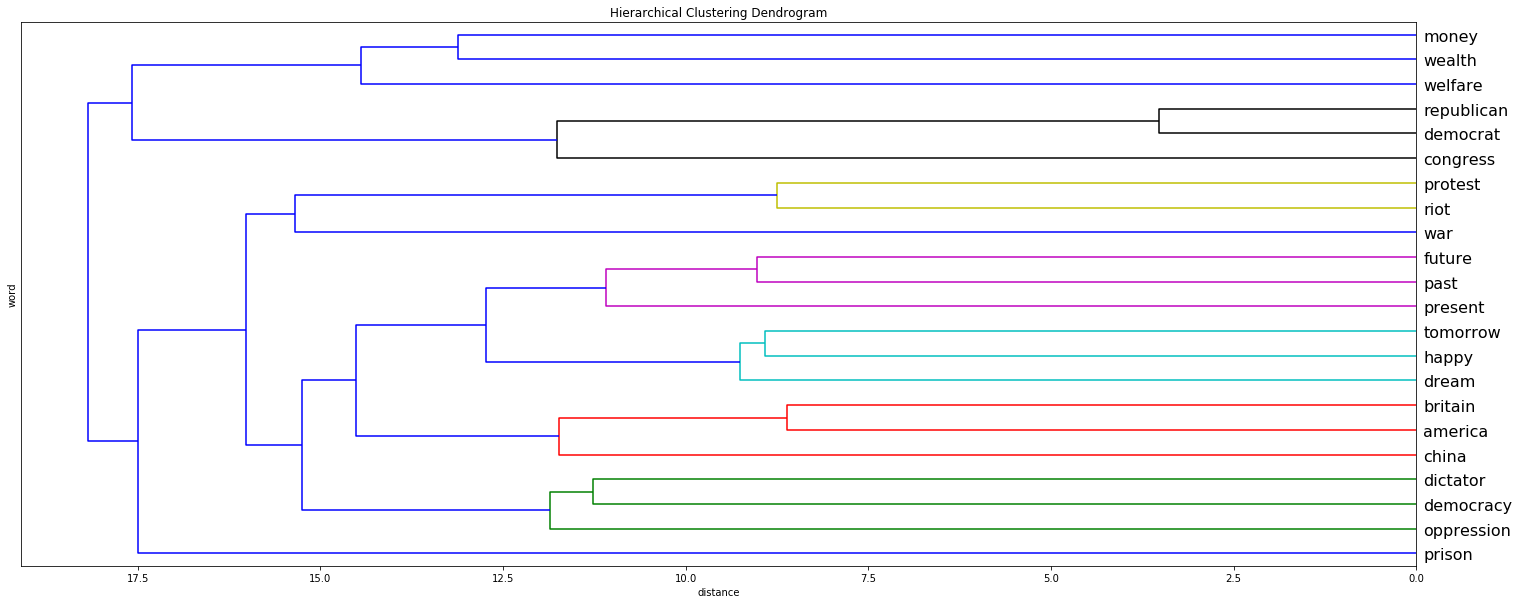

In [31]:
from matplotlib import pyplot as plt

l = links

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=16,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(keywords[v])
)
plt.show()


*Note: if you get an error above, delete any words from the list.*

### Visualizing Abstract Relatedness

In [32]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

In [33]:
#%matplotlib inline

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.wv.key_to_index ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

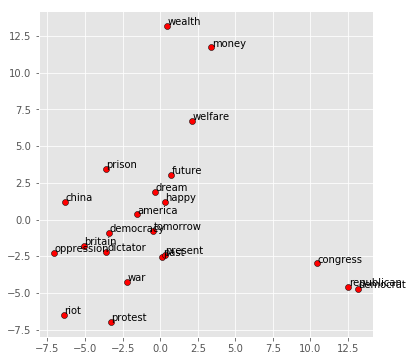

In [34]:
display_pca_scatterplot(wv, keywords)

# Study change over time

In [35]:
dataname = 'lemmatized-stopworded-bigrammed-reddit-model-'

In [36]:
keyword1 = 'war'  # the word you want to research

In [38]:
periodnames = []
years = ["07", "08", "09", "10", "11"]
for i in years:
    periodnames.append(i + "-full") 
periodnames

['07-full', '08-full', '09-full', '10-full', '11-full']

In [39]:
#########  after the first run, use this line to call the old data without generating it again
keyword_context = []
dates_found = []

# cycle through each period
for period1 in periodnames:
    print('working on ', period1)
    
    # load the model from period1
#     period_model = gensim.models.Word2Vec.load(dataname + str(period1) + '.0') # to load a saved model
    period_wv = KeyedVectors.load(dataname + period1) # load the saved model
    
    ## is the keyword found?
    if keyword1 in period_wv.wv.key_to_index:
        print('found ', keyword1)
        
        # get the context vector for keyword1
        keyword_context_period = period_wv.wv.most_similar(keyword1, topn = 5000) 
        
        # save it for later
        keyword_context.append(keyword_context_period) # save the context of how women were talked about for later
        dates_found.append(period1)

working on  07-full
found  war
working on  08-full
found  war
working on  09-full
found  war
working on  10-full
found  war
working on  11-full
found  war


#### Visualize it

In [40]:
# helper function to abstract only unique values while keeping the list in the same order -- the order of first appearance
def unique2(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [41]:
all_words = []
for i in range(len(dates_found)):
    words = [item[0] for item in keyword_context[i]][:10]
    all_words.append(words)

all_words2 = []
for list in all_words:
    for word in list:
        all_words2.append(word)

numwords = 10


In [42]:
cd ~/ 

/users/rdschaefer


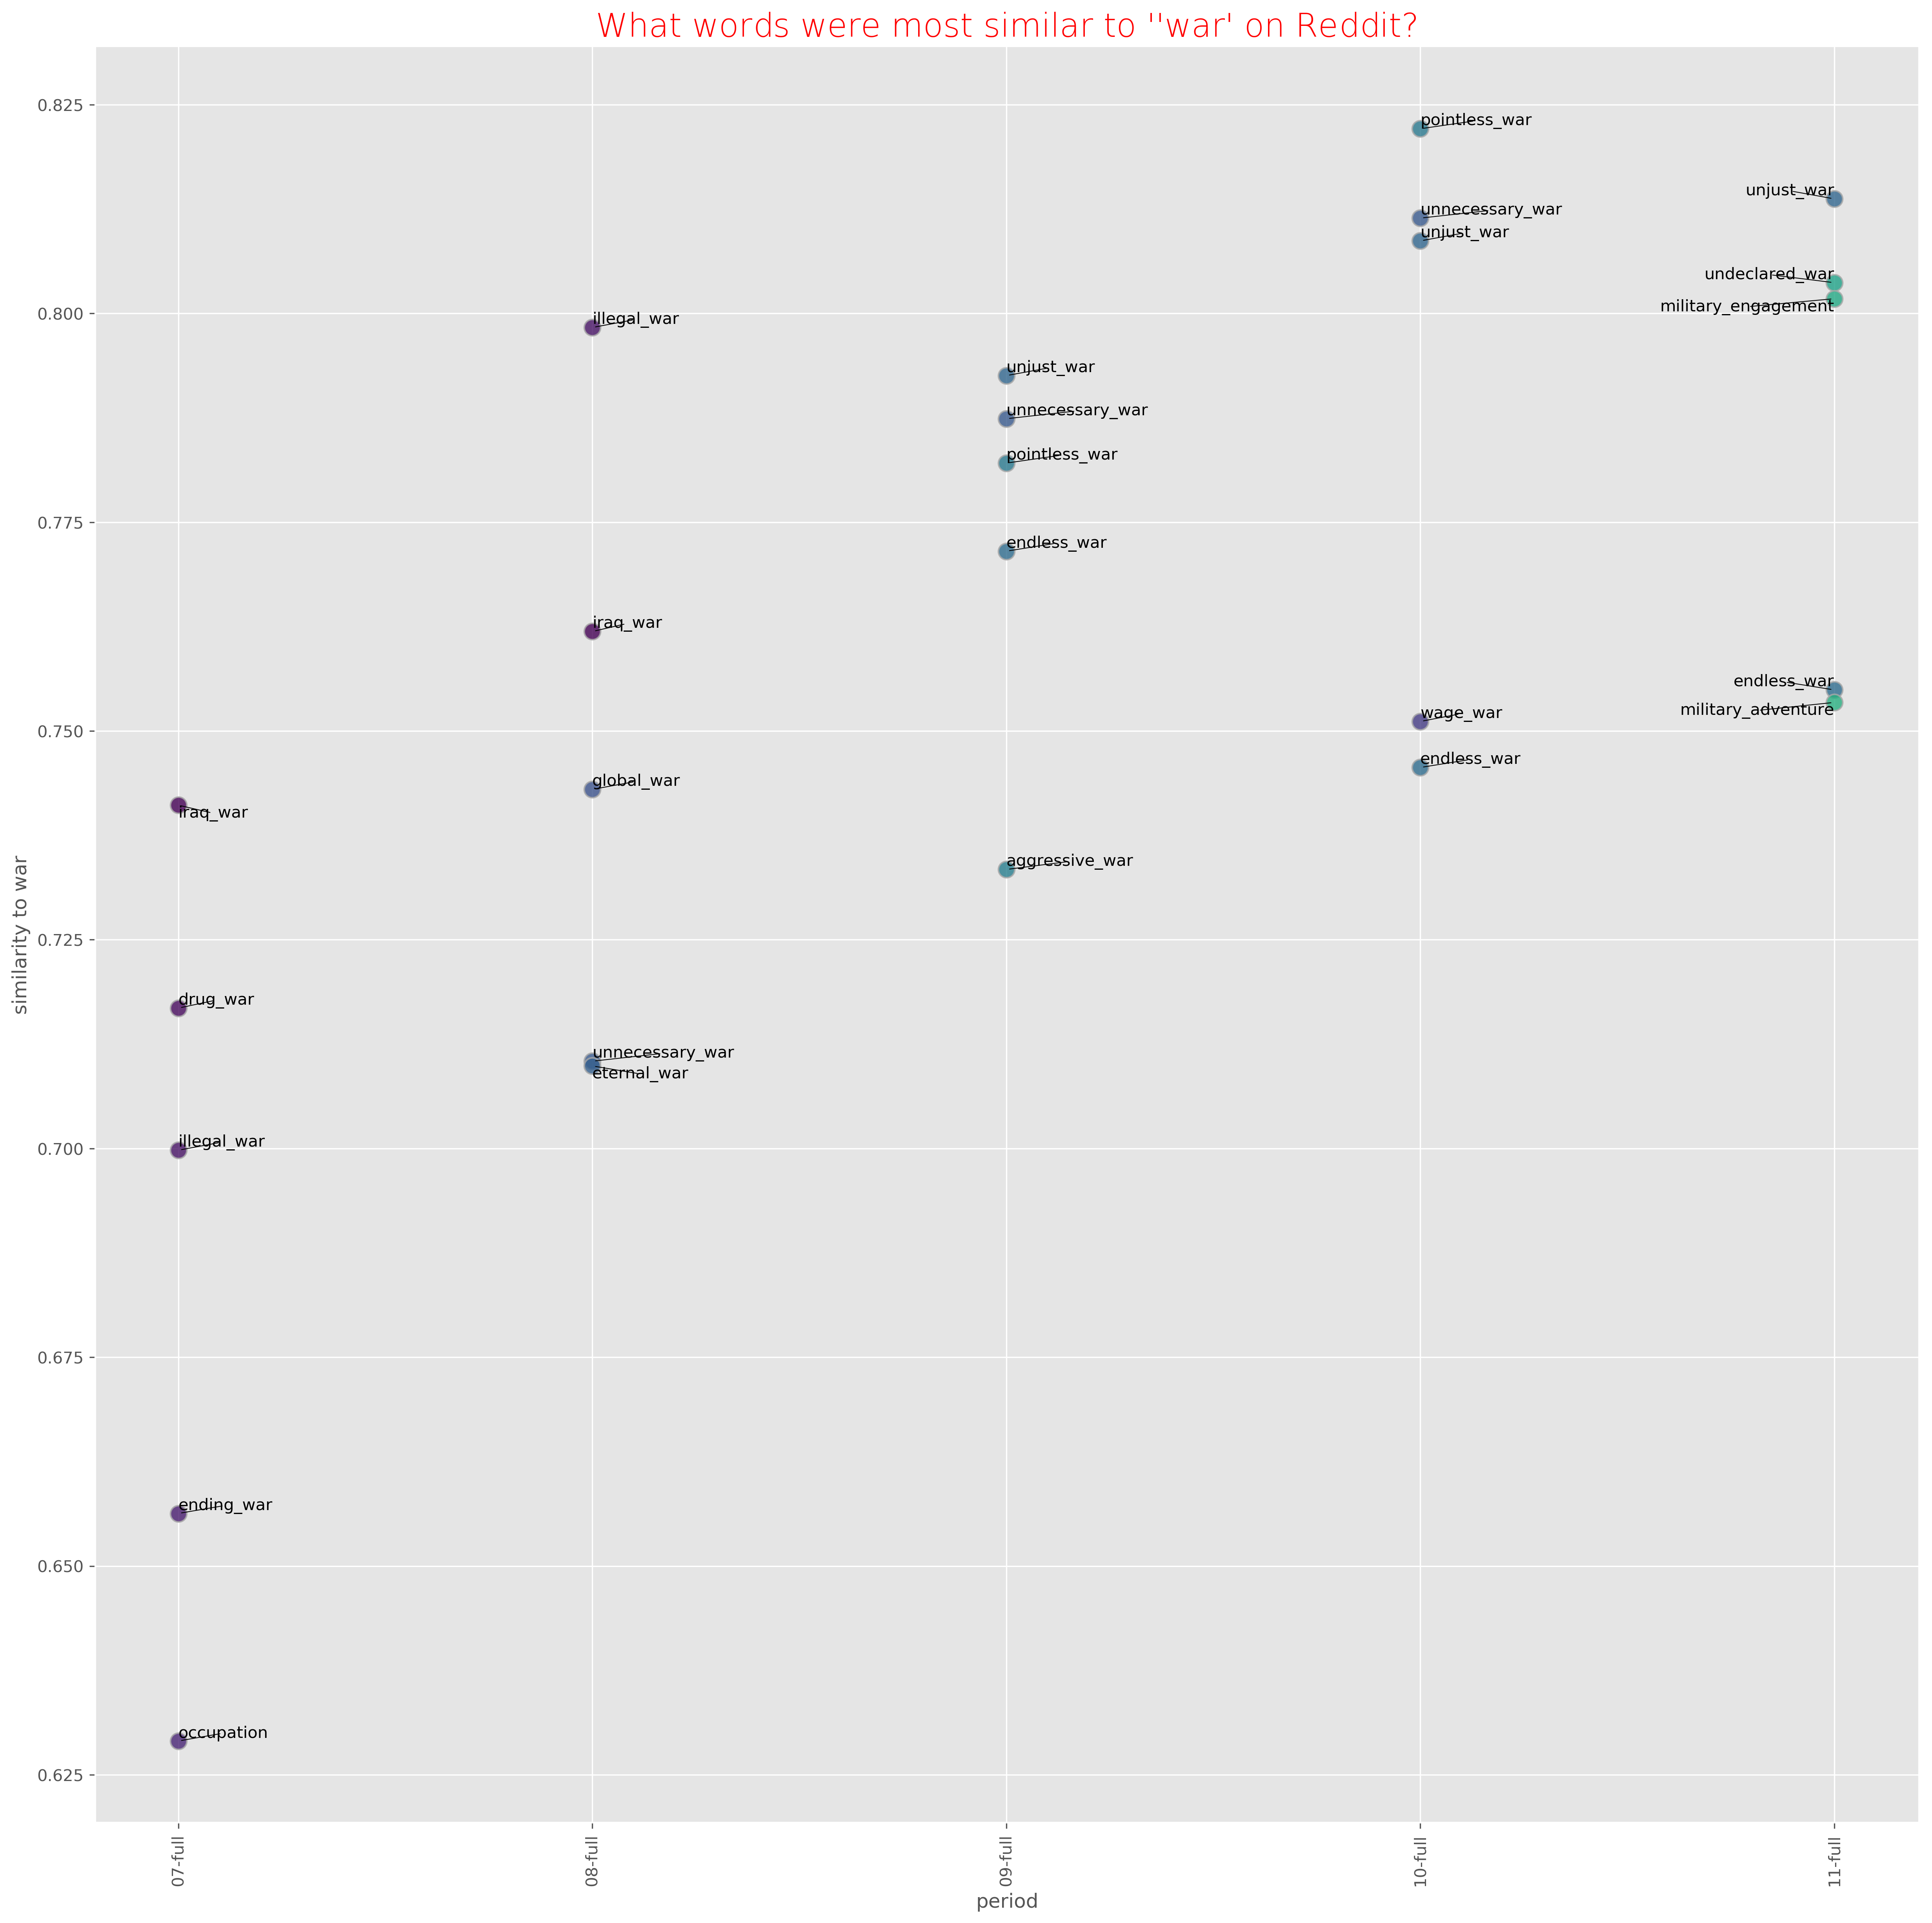

In [43]:
%matplotlib inline
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from adjustText import adjust_text
from numpy import linspace
from matplotlib import cm

colors = [ cm.viridis(x) for x in linspace(0, 1, len(unique2(all_words2))+10) ]

# change the figure's size here
plt.figure(figsize=(20,20), dpi = 300)

texts = []

# plt.annotate only plots one label per iteration, so we have to use a for loop 
for i in range(len(dates_found)):    # cycle through the period names
    
    #yyy = int(keyword_per_year[keyword_per_year['5yrperiod'] == int(xx)]['count'])   # how many times was the keyword used that year?
                     
    for j in range(5):     # cycle through the first ten words (you can change this variable)
        
        xx = dates_found[i]        # on the x axis, plot the period name
        yy = [item[1] for item in keyword_context[i]][j]         # on the y axis, plot the distance -- how closely the word is related to the keyword
        txt = [item[0] for item in keyword_context[i]][j]        # grab the name of each collocated word
        colorindex = unique2(all_words2).index(txt)   # this command keeps all dots for the same word the same color
        
        plt.scatter(                                             # plot dots
            xx, #x axis
            yy, # y axis
            linewidth=1, 
            color = colors[colorindex],
            edgecolors = 'darkgray',
            s = 100, # dot size
            alpha=0.8)  # dot transparency

        # make a label for each word
        texts.append(plt.text(xx, yy, txt))

# Code to help with overlapping labels -- may take a minute to run
adjust_text(texts, force_points=0.2, force_text=.7, 
                    expand_points=(1, 1), expand_text=(1, 1),
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

plt.xticks(rotation=90)

# Add titles
plt.title("What words were most similar to ''" + keyword1 + "' on Reddit?", fontsize=20, fontweight=0, color='Red')
plt.xlabel("period")
plt.ylabel("similarity to " + keyword1)


filename = 'words-similar-to-' + keyword1 + '-' + dataname
plt.savefig(filename)